In [208]:
import pandas as pd
df = pd.read_excel('/Users/user/Documents/공모전/실외흡연실/boothlocation.xlsx')

In [210]:
df['주소'] = df['주소'].str.replace('서울', '서울특별시')
df

,시 및 자치구,설 치 위 치,형 태,주소
0,종로구,종로구보건소,완전 개방형,서울특별시 종로구 지하문로19길 36
1,중구,을지로입구역 8번출구,부분 개방형,서울특별시 중구 남대문로 81
2,중구,하나은행본점 측면부,부분 개방형,서울특별시 중구 을지로 35
3,중구,하나카드본사 측면부,부분 개방형,서울특별시 중구 을지로 66
4,중구,장교빌딩 전면부,부분 개방형,서울특별시 중구 삼일대로 363
...,...,...,...,...
111,송파구,잠실한강공원 적환장 옆,부분 개방형,서울특별시 송파구 올림픽로 127
112,송파구,잠실한강공원 3주차장 인근,부분 개방형,서울특별시 송파구 올림픽로 129
113,서초구,잠원한강공원 1주차장 인근,부분 개방형,서울특별시 서초구 잠원로 94
114,서초구,잠원한강공원 3주차장 인근,부분 개방형,서울특별시 서초구 잠원로 98


In [212]:
!pip install selenium

In [213]:
!pip install webdriver-manager

In [214]:
df['위도'] = '0'
df['경도'] = '0'

In [294]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options


for i in df[df['위도']=='0'].index:
    # Chrome 옵션 설정 (MacOS에서 Chrome의 경로를 지정)
    options = Options()
    options.binary_location = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"  # MacOS Chrome 실행 파일 경로
    
    # ChromeDriver 경로 설정 (MacOS에 맞게 설정)
    service = Service('/opt/homebrew/bin/chromedriver')  # 또는 'which chromedriver'로 경로 확인
    
    # ChromeDriver 실행
    driver = webdriver.Chrome(service=service, options=options)
    
    # Google Earth URL 설정
    url = 'https://earth.google.com/web/search/'

    # 위도값이 null인 행의 인덱스를 추출하여, 세부주소로 위도, 경도 크롤링하기
    j = df.loc[i, '주소']
    driver.get(url + j)  # Google Earth 검색 URL 생성
    time.sleep(10)  # 페이지 로드 대기
    
    try:
        now_url = driver.current_url
        split_url = now_url.split('@')[1].split(',')
        df.loc[i, '위도'] = split_url[0]
        df.loc[i, '경도'] = split_url[1]
    except Exception as e:
        print(f"Error processing index {i}: {e}")
        pass

# 드라이버 종료
driver.close()


Error processing index 99: list index out of range


In [310]:
boothlocation = pd.read_excel('/Users/user/Documents/공모전/실외흡연실/boothlocation_coordinate.xlsx')

In [312]:
boothlocation

,Unnamed: 0,시 및 자치구,설 치 위 치,형 태,주소,위도,경도
0,0,종로구,종로구보건소,완전 개방형,서울특별시 종로구 지하문로19길 36,37.581816,126.969254
1,1,중구,을지로입구역 8번출구,부분 개방형,서울특별시 중구 남대문로 81,37.564809,126.981090
2,2,중구,하나은행본점 측면부,부분 개방형,서울특별시 중구 을지로 35,37.566440,126.981977
3,3,중구,하나카드본사 측면부,부분 개방형,서울특별시 중구 을지로 66,37.565540,126.985069
4,4,중구,장교빌딩 전면부,부분 개방형,서울특별시 중구 삼일대로 363,37.567377,126.986576
...,...,...,...,...,...,...,...
111,111,송파구,잠실한강공원 적환장 옆,부분 개방형,서울특별시 송파구 올림픽로 127,37.524268,127.097641
112,112,송파구,잠실한강공원 3주차장 인근,부분 개방형,서울특별시 송파구 올림픽로 129,37.524268,127.097640
113,113,서초구,잠원한강공원 1주차장 인근,부분 개방형,서울특별시 서초구 잠원로 94,37.512449,127.007897
114,114,서초구,잠원한강공원 3주차장 인근,부분 개방형,서울특별시 서초구 잠원로 98,37.513772,127.008170


In [314]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.9 MB/s eta 0:00:00


In [316]:
idx = []
for i in range(len(boothlocation)):
    lat = float(boothlocation.loc[i,'위도'])
    lang = float(boothlocation.loc[i,'경도'])
    if  lat<37.4 or lat>37.7:
        idx.append(i)
    elif lang<126.8 or lang>127.2:
        idx.append(i)
idx

[]

In [453]:
import folium

# 서울 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 흡연실 위치 데이터를 지도에 추가
for index, row in boothlocation.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['설 치 위 치'],
        icon=folium.features.CustomIcon('/Users/user/Documents/공모전/smoke.png', icon_size=(35, 45))).add_to(seoul_map)

# 지도 저장
seoul_map.save('seoul_smoking_booths.html')


In [459]:
len(boothlocation)

116


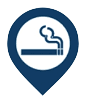
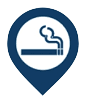
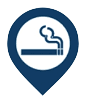
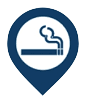
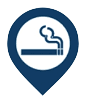
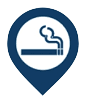
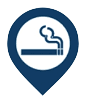
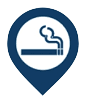
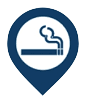
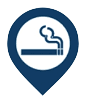
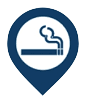
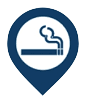
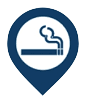
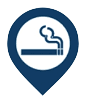
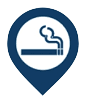
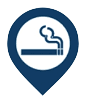
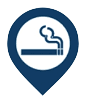
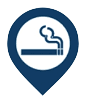
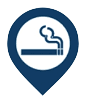
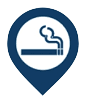
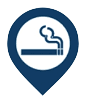
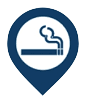
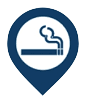
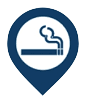
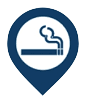
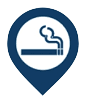
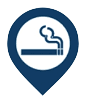
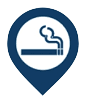
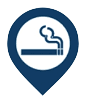
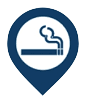
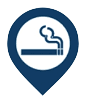
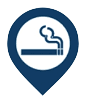
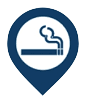
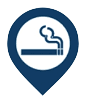
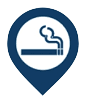
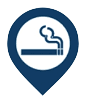
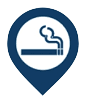
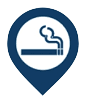
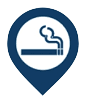
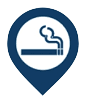
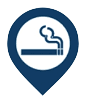
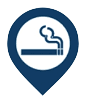
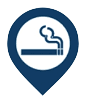
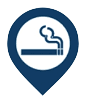
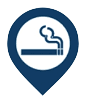
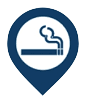
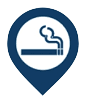
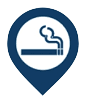
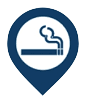
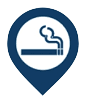
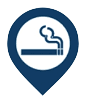
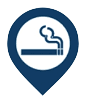
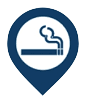
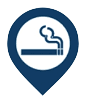
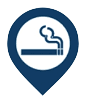
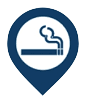
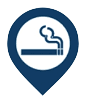
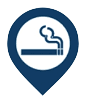
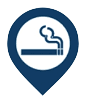
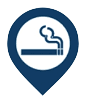
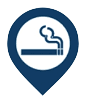
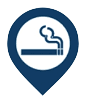
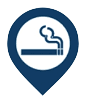
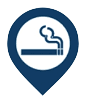
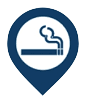
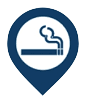
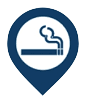
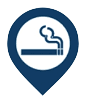
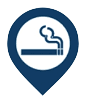
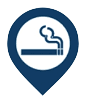
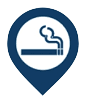
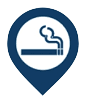
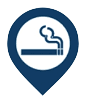
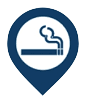
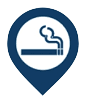
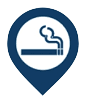
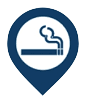
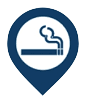
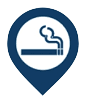
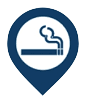
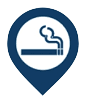
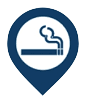
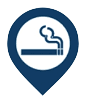
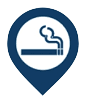
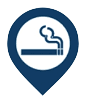
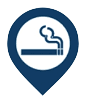
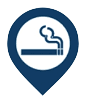
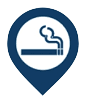
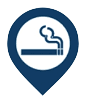
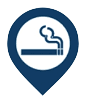
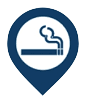
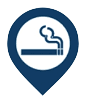
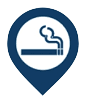
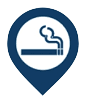
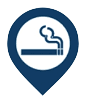
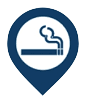
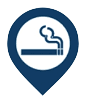
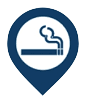
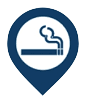
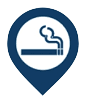
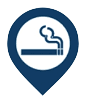
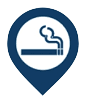
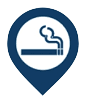
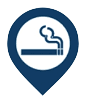
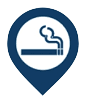
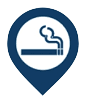
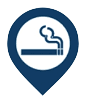
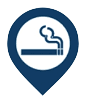
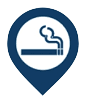
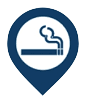
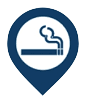
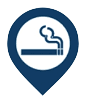
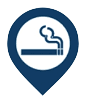
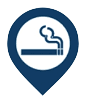
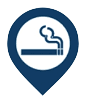
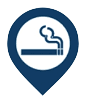

In [455]:
seoul_map

In [348]:
pip install geopandas matplotlib descartes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/pyth

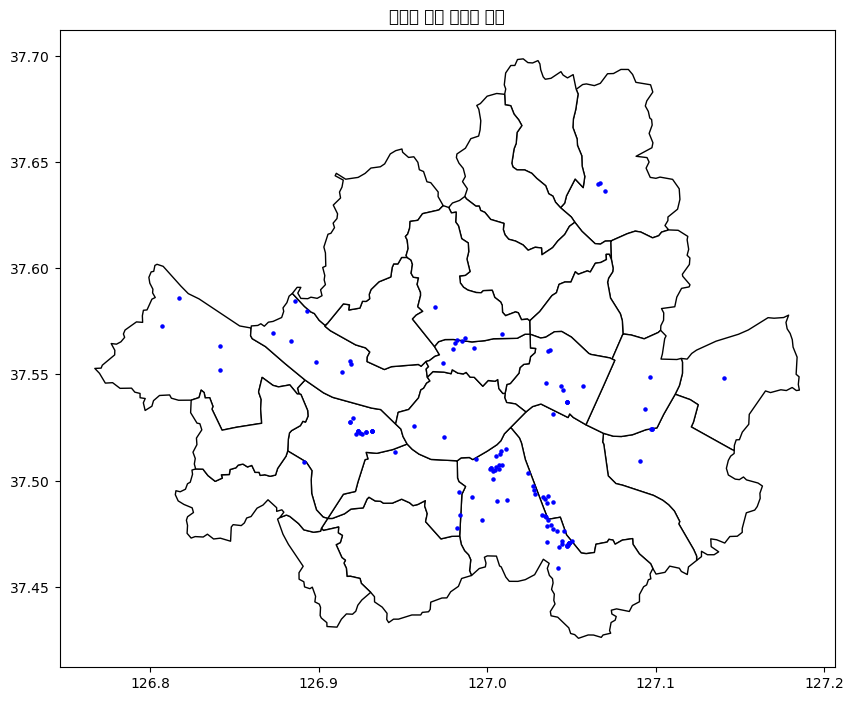

In [352]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 서울시 경계 데이터를 불러오기 (GeoJSON 파일 필요)
# 서울시 행정구역 경계가 담긴 GeoJSON 파일이 필요합니다.
seoul_boundary = gpd.read_file('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')


# 흡연실 데이터를 GeoDataFrame으로 변환 (위도와 경도 사용)
gdf_booth = gpd.GeoDataFrame(boothlocation, geometry=gpd.points_from_xy(boothlocation['경도'], boothlocation['위도']))

# 좌표계를 서울시 경계 데이터와 맞추기 (EPSG:4326 사용)
gdf_booth.set_crs(epsg=4326, inplace=True)

# 시각화: 서울 경계 내 흡연실 위치 표시
fig, ax = plt.subplots(figsize=(10, 10))
seoul_boundary.plot(ax=ax, color='white', edgecolor='black')  # 서울 경계 그리기
gdf_booth.plot(ax=ax, color='blue', markersize=5)  # 흡연실 위치 표시

plt.title('서울시 실외 흡연실 위치')
plt.show()


In [368]:
import requests
from bs4 import BeautifulSoup
import folium

# 1. HTML 페이지를 가져오기
url = 'https://github.com/sbsccs/-Project/blob/main/%EA%B8%88%EC%97%B0%EA%B5%AC%EC%97%AD(%EC%A0%84%EC%B2%B4).html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 2. 금연구역 관련 데이터를 추출
# (이 부분은 페이지의 구조에 맞춰 데이터를 추출해야 함, 예: 표나 리스트에서 정보 수집)

# 3. 예시 데이터 (좌표 기반 금연 구역)
locations = [
    {'name': '금연구역 1', 'lat': 37.5665, 'lon': 126.9780},
    {'name': '금연구역 2', 'lat': 37.5640, 'lon': 126.9750},
    # 추가 데이터...
]

# 4. folium을 사용해 금연구역을 지도에 표시
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 금연구역 마커 추가
for loc in locations:
    folium.Marker([loc['lat'], loc['lon']], popup=loc['name']).add_to(seoul_map)

# 5. 결과 지도 저장
seoul_map.save('seoul_no_smoking_zones.html')

# Jupyter 노트북에서 결과 확인 (선택적)
from IPython.display import IFrame
IFrame('seoul_no_smoking_zones.html', width=700, height=500)

In [394]:
df1 = pd.read_csv('/Users/user/Documents/공모전/금연구역/강남금연구역.csv', encoding='UTF-8')
df2 = pd.read_csv('/Users/user/Documents/공모전/금연구역/강서금연구역.csv', encoding='EUC-KR')
df3 = pd.read_csv('/Users/user/Documents/공모전/금연구역/도봉금연구역.csv', encoding='EUC-KR')
df4 = pd.read_csv('/Users/user/Documents/공모전/금연구역/노원금연구역.csv', encoding='UTF-8')
df5 = pd.read_csv('/Users/user/Documents/공모전/금연구역/강동금연구역.csv', encoding='EUC-KR')
df6 = pd.read_csv('/Users/user/Documents/공모전/금연구역/양천금연구역.csv', encoding='EUC-KR')
df7 = pd.read_csv('/Users/user/Documents/공모전/금연구역/마포금연구역.csv', encoding='EUC-KR')
df8 = pd.read_csv('/Users/user/Documents/공모전/금연구역/용산금연구역.csv', encoding='EUC-KR')
df9 = pd.read_csv('/Users/user/Documents/공모전/금연구역/성동금연구역.csv', encoding='EUC-KR')
df10 = pd.read_csv('/Users/user/Documents/공모전/금연구역/강북금연구역.csv', encoding='EUC-KR')
df11 = pd.read_csv('/Users/user/Documents/공모전/금연구역/광진금연구역.csv', encoding='EUC-KR')
df12 = pd.read_csv('/Users/user/Documents/공모전/금연구역/중금연구역.csv', encoding='EUC-KR')
df13 = pd.read_csv('/Users/user/Documents/공모전/금연구역/은평금연구역.csv', encoding='EUC-KR')
df14 = pd.read_csv('/Users/user/Documents/공모전/금연구역/영등포금연구역.csv', encoding='EUC-KR')
df15 = pd.read_csv('/Users/user/Documents/공모전/금연구역/송파금연구역.csv', encoding='EUC-KR')
df16 = pd.read_csv('/Users/user/Documents/공모전/금연구역/동작금연구역.csv', encoding='EUC-KR')
df17 = pd.read_csv('/Users/user/Documents/공모전/금연구역/구로금연구역.csv', encoding='EUC-KR')
df18 = pd.read_csv('/Users/user/Documents/공모전/금연구역/관악금연구역.csv', encoding='EUC-KR')
df19 = pd.read_csv('/Users/user/Documents/공모전/금연구역/금천금연구역.csv', encoding='EUC-KR')
df20 = pd.read_csv('/Users/user/Documents/공모전/금연구역/성북금연구역.csv', encoding='EUC-KR')
df21 = pd.read_csv('/Users/user/Documents/공모전/금연구역/중랑금연구역.csv', encoding='EUC-KR')
df22 = pd.read_csv('/Users/user/Documents/공모전/금연구역/종로금연구역.csv', encoding='EUC-KR')
df23 = pd.read_csv('/Users/user/Documents/공모전/금연구역/서대문금연구역.csv', encoding='EUC-KR')
df24 = pd.read_csv('/Users/user/Documents/공모전/금연구역/동대문금연구역.csv', encoding='EUC-KR')
df25 = pd.read_csv('/Users/user/Documents/공모전/금연구역/서초금연구역.csv', encoding='UTF-8')

In [404]:
df_all = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25],ignore_index=True)

In [408]:
df_all.to_excel('/Users/user/Documents/공모전/금연구역/서울시전체금연구역.xlsx',index=False)

In [441]:
locations = df_all[['위도', '경도']].dropna()

# 서울 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

for _, row in locations.iterrows():
    folium.Circle(
        location=[row['위도'], row['경도']],
        radius=30,  
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(seoul_map)

# 결과 지도 저장
seoul_map.save('seoul_no_smoking_zones_with_radius.html')

print("지도 파일이 'seoul_no_smoking_zones_with_radius.html'로 저장되었습니다.")

지도 파일이 'seoul_no_smoking_zones_with_radius.html'로 저장되었습니다.
